In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import pandas as pd

df = pd.read_parquet("https://datasets-documentation.s3.eu-west-3.amazonaws.com/amazon_reviews/amazon_reviews_2010.snappy.parquet",columns=["star_rating","review_body"])


In [4]:
for i in range(1,6):
    print("star_rating: ", i)
    print(df[df['star_rating'] == i].count())
    print('-------------------------')

star_rating:  1
star_rating    382315
review_body    382315
dtype: int64
-------------------------
star_rating:  2
star_rating    222957
review_body    222957
dtype: int64
-------------------------
star_rating:  3
star_rating    333851
review_body    333851
dtype: int64
-------------------------
star_rating:  4
star_rating    735597
review_body    735597
dtype: int64
-------------------------
star_rating:  5
star_rating    2193752
review_body    2193752
dtype: int64
-------------------------


In [5]:
for i in range(1,6):
    new_df = 'df' + str(i)
    globals()[new_df] = df[df['star_rating'] == i].sample(n=2000)

In [6]:
df = pd.concat([df1,df2,df3,df4,df5])
df.count()

,0
star_rating,10000
review_body,10000


In [7]:
df['review_body'] = df['review_body'].astype(str)
df['star_rating'] = df['star_rating'].astype("int64")

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2976466 to 2088262
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  10000 non-null  int64 
 1   review_body  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


,0
star_rating,0
review_body,0


In [9]:
df['review_body']

,review_body
2976466,I just got this plate and it arrived completly...
936493,I purchased this MP3 player to listen to both ...
2149135,This thing doesn't work at all!!! As soon as t...
2562965,It is not clear on which edition this book was...
3577968,This book is something NO new mother should re...
...,...
2742452,I finally found the true to life way to eat. I...
788588,"I love everything about this watch, the concep..."
1220961,It's a great product and it was delivered at m...
1958554,these are so great we play them as back ground...


In [10]:
df = df.rename(columns={'review_body': 'text', 'star_rating': 'label'})

In [11]:
df['text']

,text
2976466,I just got this plate and it arrived completly...
936493,I purchased this MP3 player to listen to both ...
2149135,This thing doesn't work at all!!! As soon as t...
2562965,It is not clear on which edition this book was...
3577968,This book is something NO new mother should re...
...,...
2742452,I finally found the true to life way to eat. I...
788588,"I love everything about this watch, the concep..."
1220961,It's a great product and it was delivered at m...
1958554,these are so great we play them as back ground...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2976466 to 2088262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  int64 
 1   text    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [13]:
df['label'].value_counts()

,count
label,
1,2000
2,2000
3,2000
4,2000
5,2000


In [19]:
df["label"] = df["label"] - 1

In [20]:
import matplotlib.pyplot as plt

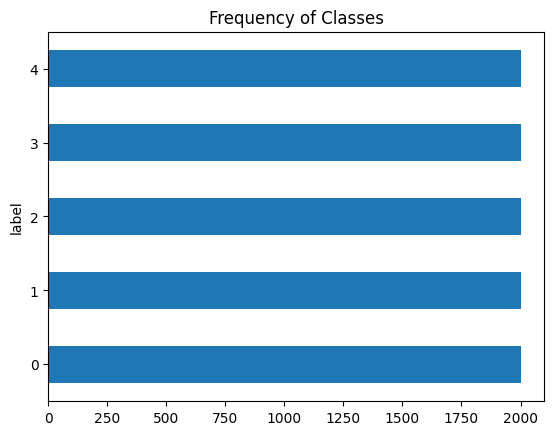

In [21]:
label_counts = df['label'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [22]:
from transformers import AutoTokenizer

base_model = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(base_model)

text = "This product is very good."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1188, 3317, 1110, 1304, 1363, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [23]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'])
test_df, validation_df = train_test_split(test_df, test_size=0.5, stratify=test_df['label'])

train_df.shape, test_df.shape, validation_df.shape

((8000, 2), (1000, 2), (1000, 2))

In [24]:
from datasets import Dataset, DatasetDict, Features, Value, ClassLabel

dataset = DatasetDict({
    'train': Dataset.from_pandas(train_df, preserve_index=False),
    'test': Dataset.from_pandas(test_df, preserve_index=False),
    'validation': Dataset.from_pandas(validation_df, preserve_index=False)
})

dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 1000
    })
})

In [25]:
dataset['train'].features

{'label': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None)}

In [26]:
dataset['train']['label'][:10]

[3, 3, 2, 4, 2, 0, 4, 3, 0, 2]

In [27]:
dataset['train'].features

{'label': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None)}

In [28]:
def tokenize(temp):
    result = tokenizer(temp['text'], padding=True, truncation=True)
    return result

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 146, 20989, 119, 119, 119, 146, 112, 182, 1136, 170, 1607, 171, 9435, 113, 1107, 1415, 1226, 171, 120, 172, 1139, 1864, 118, 2962, 1110, 4780, 114, 117, 1133, 146, 112, 1396, 1579, 1125, 1126, 2199, 1107, 1103, 1510, 23165, 5253, 2801, 1104, 1103, 1535, 2292, 1607, 12246, 1106, 1166, 21163, 119, 4516, 117, 146, 1108, 3888, 1107, 1109, 2453, 7123, 2185, 1181, 117, 170, 2793, 1520, 1118, 2550, 20452, 16608, 2087, 117, 1105, 2700, 1122, 1112, 1141, 1106, 3531, 1121, 8135, 113, 1107, 1862, 1111, 170, 4437, 1106, 3189, 1122, 1133, 192, 120, 1185, 6263, 1113, 1184, 146, 3593, 114, 119, 1109, 1520, 1110, 3378, 1113, 1103, 1313, 1297, 1104, 1819, 7123, 1105, 1103, 1535, 1119, 8361, 1111, 1259, 1117, 1534, 117, 1117, 1676, 117, 8595, 1124, 25004, 1116, 113, 170, 6748, 192, 120, 2292, 1119, 1125, 170, 1263, 2398, 114, 117, 1117, 5421, 113, 1178, 1160, 2077, 1106, 22777, 114, 117, 1105, 170, 2113, 1113, 1117, 13118, 1116, 119, 146, 1541, 4927, 1142, 1520, 119, 1135, 2799, 111

In [29]:
review_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [30]:
# label2id, id2label
label2id = {'Excellent' : 4, 'Good' : 3, 'Average' : 2, 'Below Average' : 1, 'Poor' : 0}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'Excellent': 4, 'Good': 3, 'Average': 2, 'Below Average': 1, 'Poor': 0},
 {4: 'Excellent', 3: 'Good', 2: 'Average', 1: 'Below Average', 0: 'Poor'})

In [31]:
from transformers import AutoModel
import torch

In [32]:
base_model

'bert-base-cased'

In [33]:
model = AutoModel.from_pretrained(base_model)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [34]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [35]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [36]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

In [37]:
!nvidia-smi

Wed May  7 10:23:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [38]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(base_model, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(base_model, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Poor",
    "1": "Below Average",
    "2": "Average",
    "3": "Good",
    "4": "Excellent"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Average": 2,
    "Below Average": 1,
    "Excellent": 4,
    "Good": 3,
    "Poor": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

In [40]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [41]:
from transformers import TrainingArguments

batch_size = 32
training_dir = "bert_base_train_dir"
gradient_accumulation_steps = 2

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir = True,
    run_name = 'experiment_v1',
    num_train_epochs = 1,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    eval_strategy = 'no', #'epoch',
    disable_tqdm = False,
    report_to = 'none'
)

In [42]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [43]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args,
    compute_metrics=compute_metrics,
    train_dataset = review_encoded['train'],
    eval_dataset = review_encoded['validation'],
    tokenizer = tokenizer
)

<ipython-input-43-ecfbe759161c>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [44]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=250, training_loss=1.2820849609375, metrics={'train_runtime': 751.4357, 'train_samples_per_second': 10.646, 'train_steps_per_second': 0.333, 'total_flos': 2104945139712000.0, 'train_loss': 1.2820849609375, 'epoch': 1.0})

In [45]:
preds_output = trainer.predict(review_encoded['test'])
preds_output.metrics

{'test_loss': 1.1016895771026611,
 'test_accuracy': 0.521,
 'test_f1': 0.50896805898756,
 'test_runtime': 32.4963,
 'test_samples_per_second': 30.773,
 'test_steps_per_second': 0.985}

In [46]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = review_encoded['test'][:]['label']

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62       200
           1       0.46      0.51      0.49       200
           2       0.46      0.35      0.40       200
           3       0.46      0.33      0.38       200
           4       0.59      0.74      0.66       200

    accuracy                           0.52      1000
   macro avg       0.51      0.52      0.51      1000
weighted avg       0.51      0.52      0.51      1000



In [48]:
label2id

{'Excellent': 4, 'Good': 3, 'Average': 2, 'Below Average': 1, 'Poor': 0}

In [49]:
# plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

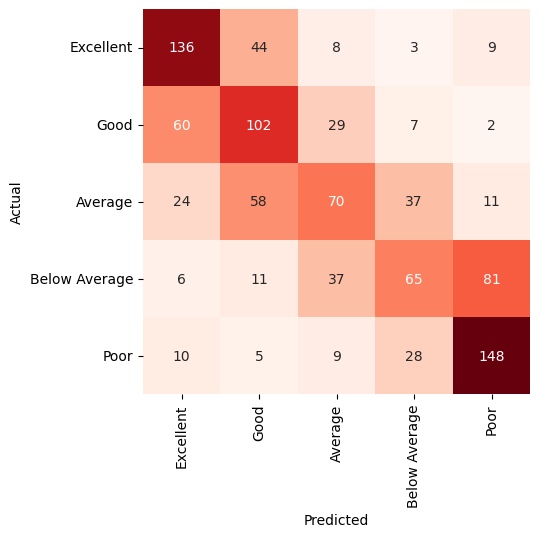

In [50]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [51]:
trainer.save_model("bert-base-uncased-amazon-review-model")

In [52]:
# use pipeline for prediciton
from transformers import pipeline

classifier = pipeline('text-classification', model= 'bert-base-uncased-amazon-review-model')

classifier("I like this toy. I recommned this to my friends!")



Device set to use cuda:0


[{'label': 'Excellent', 'score': 0.7498204708099365}]

In [53]:
classifier("Disapointed")

[{'label': 'Poor', 'score': 0.492951899766922}]